In [2]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

import data_visualization as dv
from IPython.display import display
wheel = dv.ColorWheel()
dv.set_plot_style("cashaback_dark.mplstyle")

Successfully changed to cashaback_dark.mplstyle


In [14]:
dtypes = {
    "id": pl.Int64,
    "SeriousDlqin2yrs": pl.Int64,
    "RevolvingUtilizationOfUnsecuredLines": pl.Float64,
    "age": pl.Int64,
    "NumberOfTime30-59DaysPastDueNotWorse": pl.Int64,
    "DebtRatio": pl.Float64,
    "MonthlyIncome": pl.Float64,
    "NumberOfOpenCreditLinesAndLoans": pl.Int64,
    "NumberOfTimes90DaysLate": pl.Int64,
    "NumberOfTime60-89DaysPastDueNotWorse": pl.Int64,
    "NumberRealEstateLoansOrLines": pl.Int64,
    "NumberOfDependents": pl.Float64,
}

train_pd = pd.read_csv("data/GiveMeSomeCredit/cs-training.csv", index_col=0)
train = pl.DataFrame(train_pd)
test_pd = pd.read_csv("data/GiveMeSomeCredit/cs-test.csv", index_col=0)
test = pl.DataFrame(test_pd)
cols = train.columns[1:]
continuous_cols = [
    "RevolvingUtilizationOfUnsecuredLines",
    "age",
    "DebtRatio",
    "MonthlyIncome",
    "NumberOfOpenCreditLinesAndLoans",
    "NumberRealEstateLoansOrLines",
    "NumberOfDependents",
]
categorical_cols = [
    "SeriousDlqin2yrs",
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate",
    "NumberOfTime60-89DaysPastDueNotWorse",
]

In [15]:
train_pd.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
display(train_pd.sample(5))
display(test_pd.info())



,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
54363,0,0.162918,49,0,0.093217,5631.0,19,0,0,0,0.0
65249,0,0.102563,74,0,0.364234,7000.0,12,0,1,0,0.0
127424,0,0.043254,75,0,1353.000000,NaN,10,0,1,0,0.0
78304,0,0.119727,51,0,0.874837,2300.0,10,0,1,0,0.0
28736,0,0.183576,64,1,0.442542,7300.0,21,0,2,0,0.0


<class 'pandas.DataFrame'>
RangeIndex: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtypes: float64(

None

In [25]:
test_pd.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


Missing data

In [24]:
rows = len(test_pd)
missing = test_pd.isna().sum()
missing_percent = missing / rows * 100
missing_df = pd.DataFrame({"missing": missing, "missing_percent": missing_percent})
missing_df.sort_values("missing", ascending=False, inplace=True)

display(missing_df)

,missing,missing_percent
SeriousDlqin2yrs,101503,100.000000
MonthlyIncome,20103,19.805326
NumberOfDependents,2626,2.587116
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000


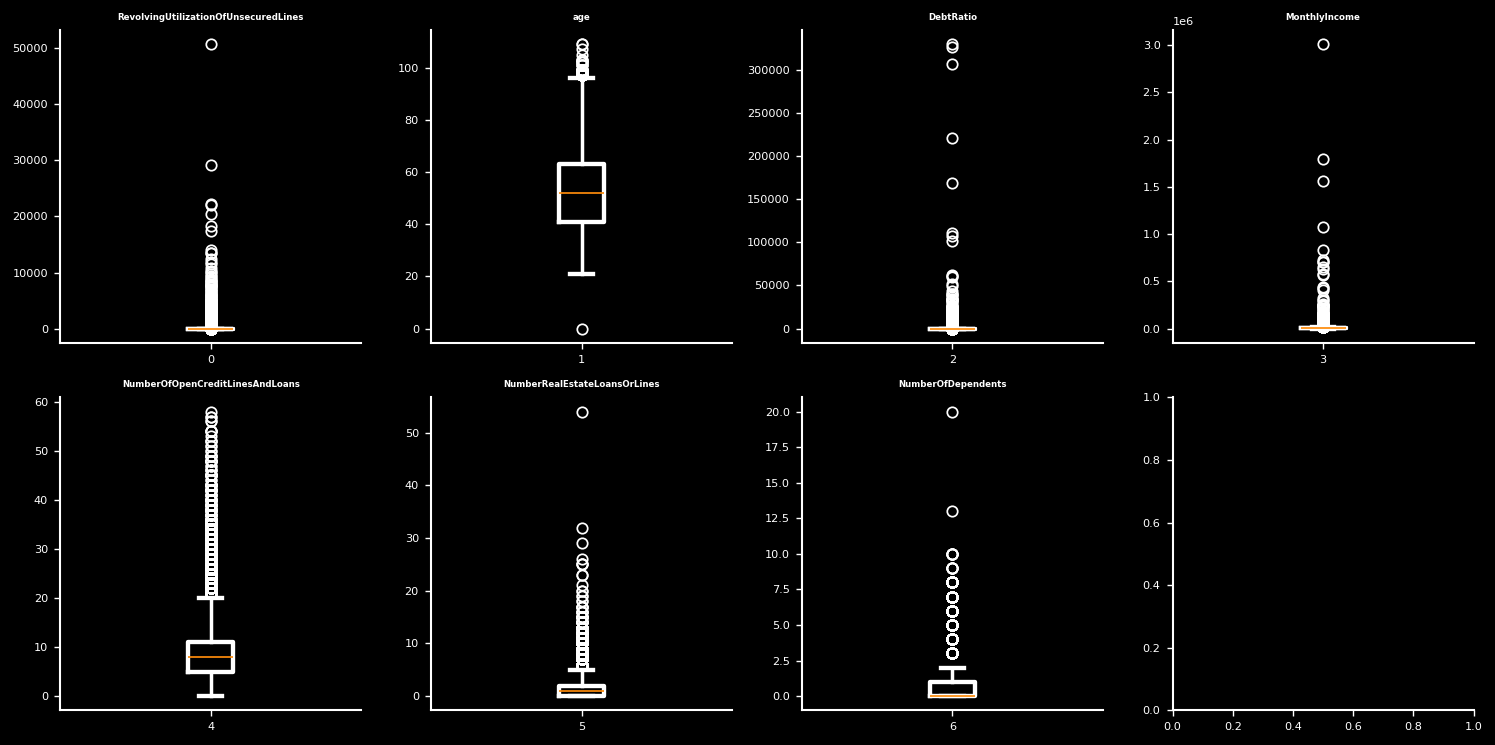

In [22]:
# Boxplots of continuous data
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

xlocs = np.arange(0, len(continuous_cols), 1)
for i, col in enumerate(continuous_cols):
    ax = axes.flatten()[i]
    data = train.select(pl.col(col)).drop_nulls()
    ax.boxplot(data.to_numpy().flatten(), positions=[xlocs[i]])
    ax.set_title(col, fontsize=5)

plt.tight_layout()
plt.show()


shape: (2, 2)
┌──────────────────┬────────┐
│ SeriousDlqin2yrs ┆ count  │
│ ---              ┆ ---    │
│ i64              ┆ u32    │
╞══════════════════╪════════╡
│ 1                ┆ 10026  │
│ 0                ┆ 139974 │
└──────────────────┴────────┘
shape: (16, 2)
┌─────────────────────────────────┬────────┐
│ NumberOfTime30-59DaysPastDueNo… ┆ count  │
│ ---                             ┆ ---    │
│ i64                             ┆ u32    │
╞═════════════════════════════════╪════════╡
│ 98                              ┆ 264    │
│ 96                              ┆ 5      │
│ 13                              ┆ 1      │
│ 12                              ┆ 2      │
│ 11                              ┆ 1      │
│ …                               ┆ …      │
│ 4                               ┆ 747    │
│ 3                               ┆ 1754   │
│ 2                               ┆ 4598   │
│ 1                               ┆ 16033  │
│ 0                               ┆ 126018 │
└──────────

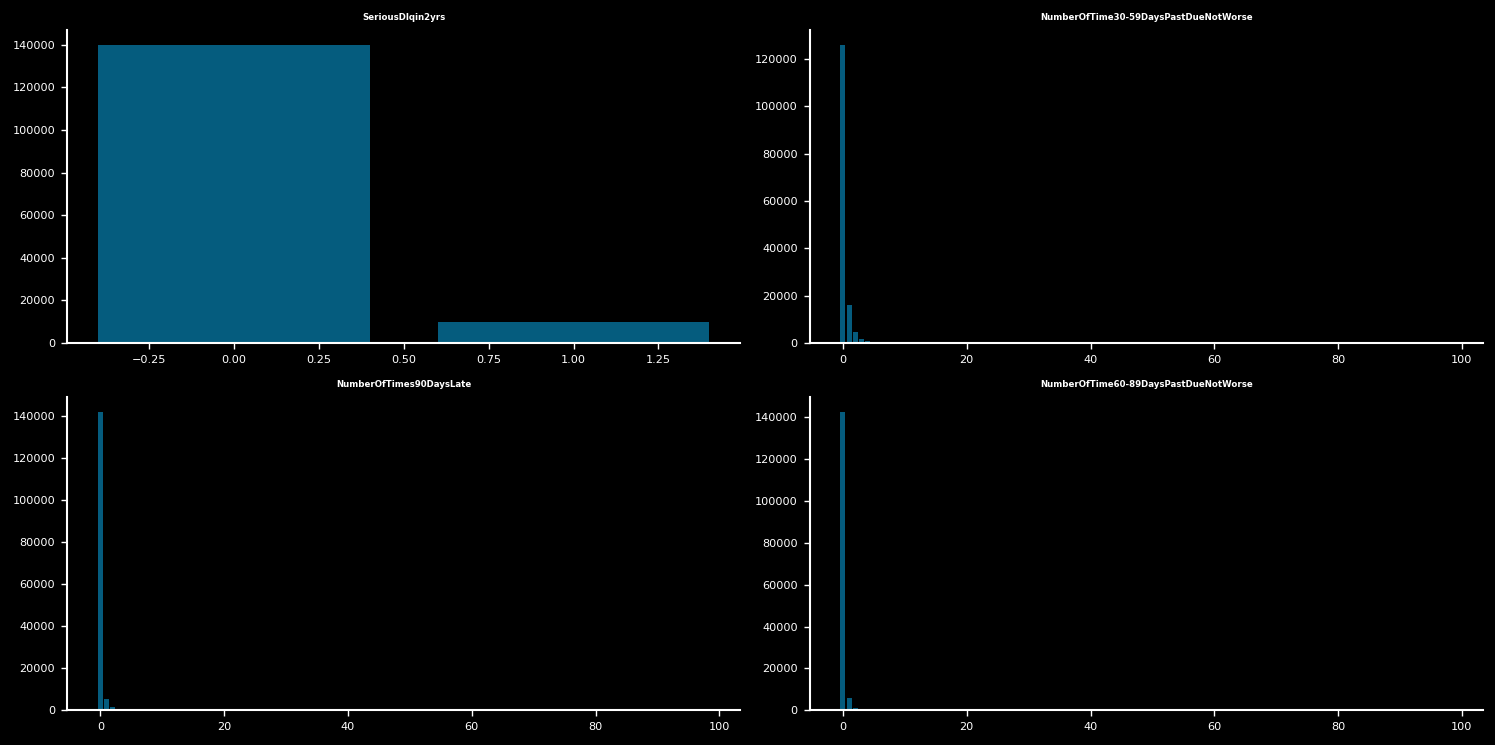

In [6]:
# Boxplots of categorial data
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
xlocs = [0, 1]
for i, col in enumerate(categorical_cols):
    ax = axes.flatten()[i]
    # Plot 1's
    df = train.get_column(col).value_counts().sort(by=col, descending=True)
    print(df)
    ax.bar(
        df.get_column(col),
        df.get_column("count"),
        alpha=0.5,
        label="1",
        color=wheel.rak_blue,
    )
    ax.set_title(col, fontsize=5)
plt.tight_layout()
plt.show()

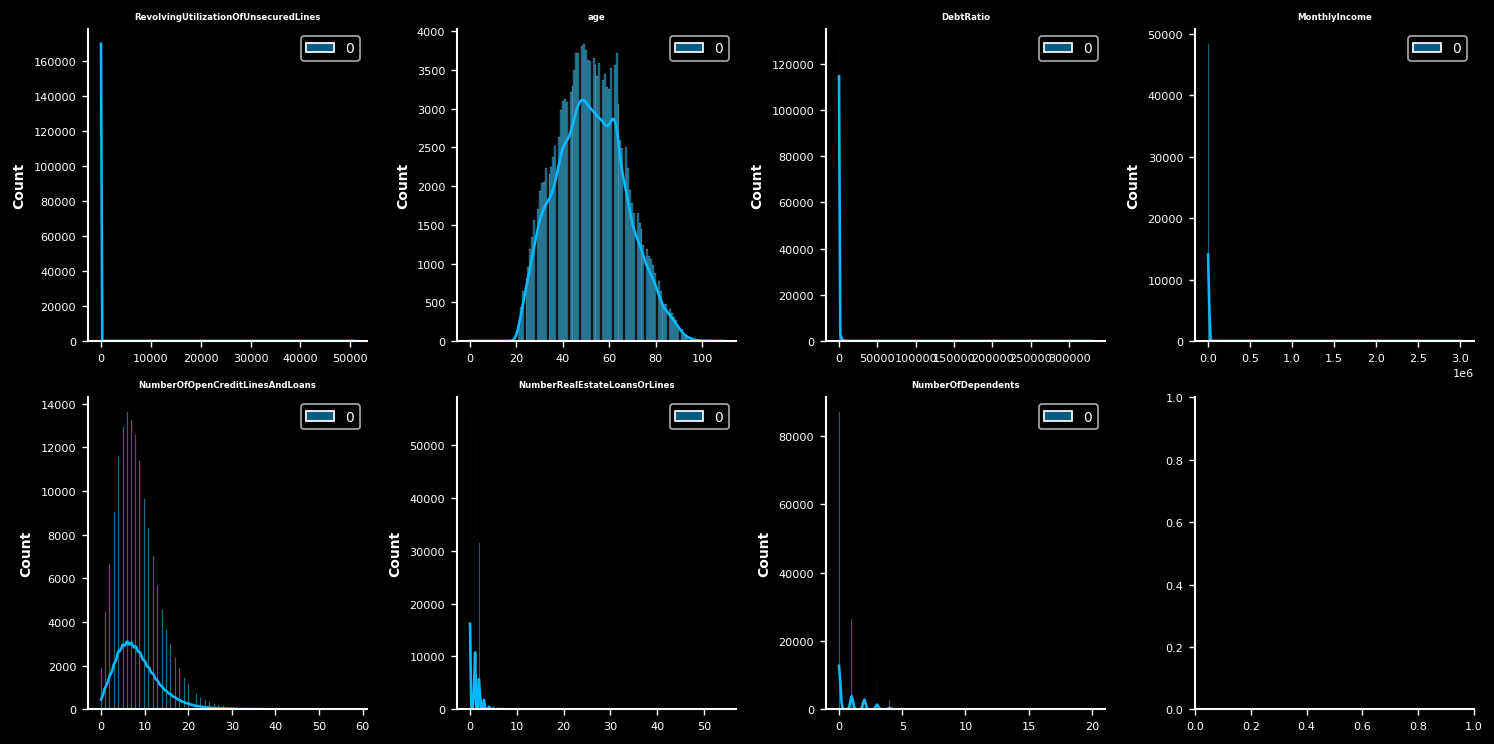

In [7]:
# Correlation plots of continuous data
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, col in enumerate(continuous_cols):
    ax = axes.flatten()[i]
    sns.histplot(train.select(col), ax=ax, color=wheel.rak_blue, kde=True)
    ax.set_title(col, fontsize=5)
plt.tight_layout()
plt.show()
